# Exploratory Data Analysis (EDA)
This notebook covers all required EDA steps for the finance and insurance data project.

In [14]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root or parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.pardir)))

from src import eda, utils

data = utils.load_data('../data/raw/MachineLearningRating_v3.txt')
data = eda.calculate_loss_ratio(data)

c:\Users\Admin\Desktop\DESKTOP\finance-insurance-data-analysis\src\utils.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(file_path, sep='|')  # Specify pipe delimiter for .txt files


Data loaded successfully with 1000098 rows and 52 columns.


In [15]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## Data Structure and Quality Assessment

In [16]:
print('Data types:')
print(eda.review_data_types(data))
print('Missing values:')
print(eda.check_missing_values(data))

Data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors   

## Descriptive Statistics

In [17]:
print(eda.descriptive_statistics(data))

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

c:\Users\Admin\Desktop\DESKTOP\finance-insurance-data-analysis\myenv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


## Univariate Analysis: Distributions

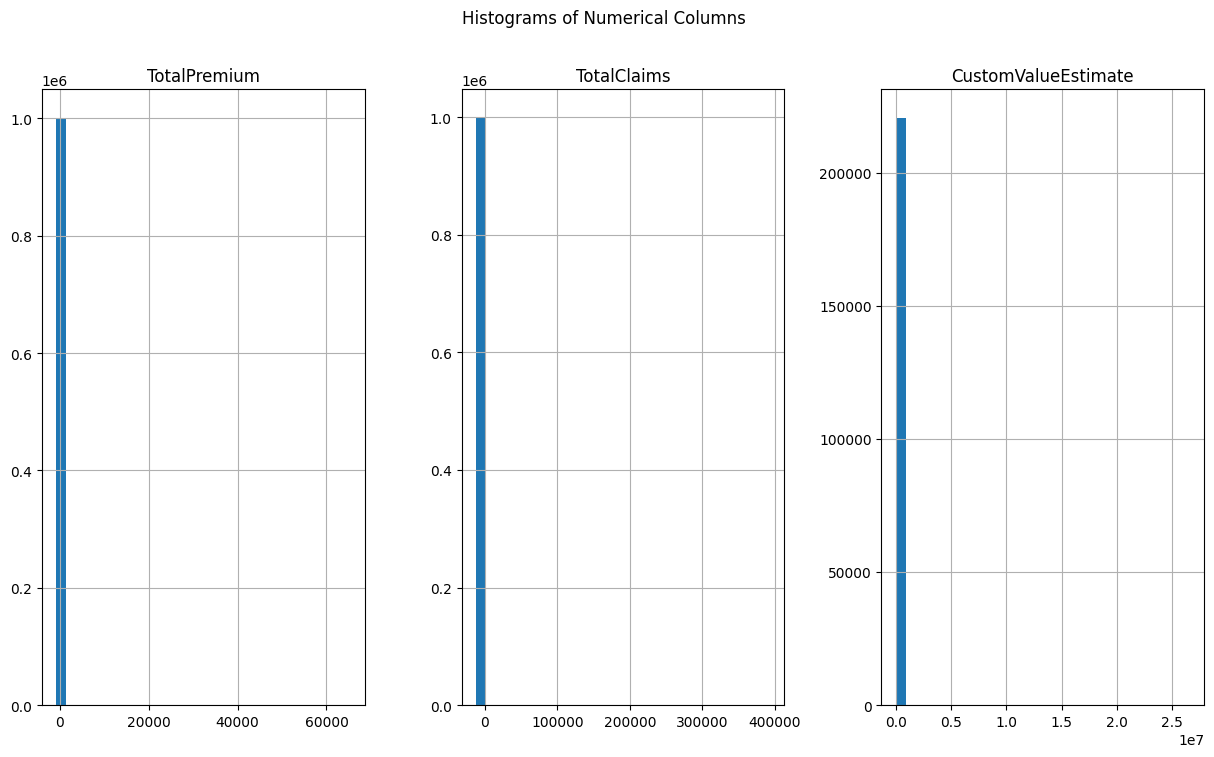

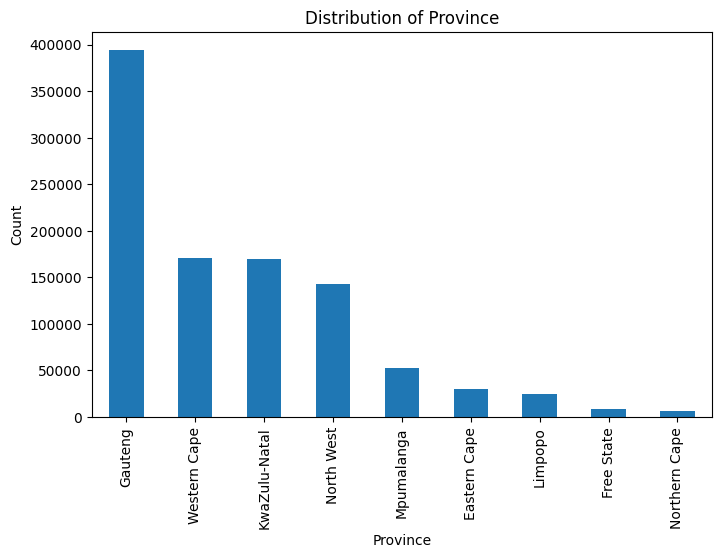

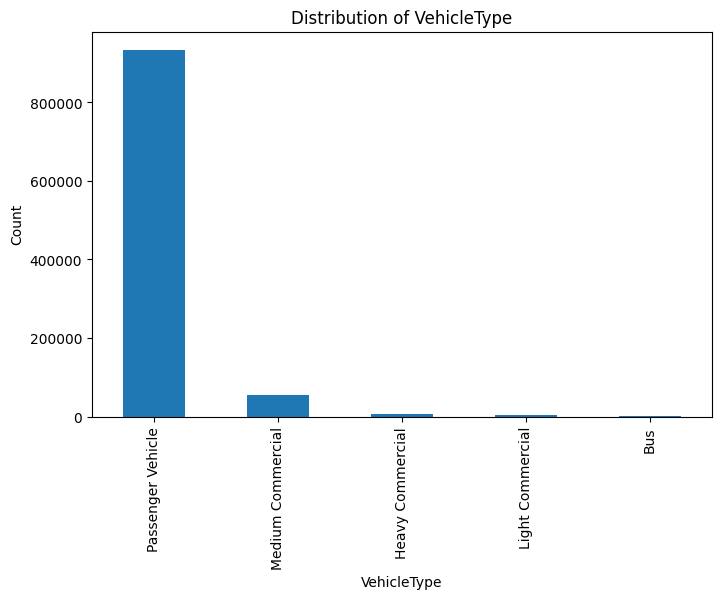

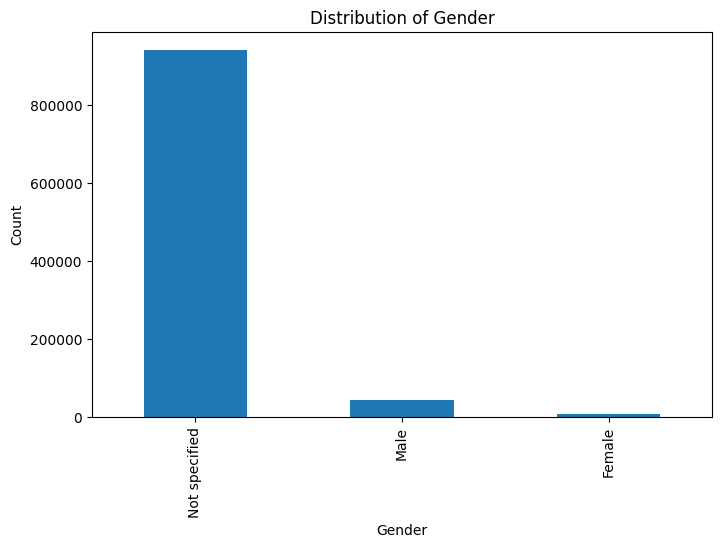

In [18]:
eda.plot_histograms(data, ['TotalPremium', 'TotalClaims', 'CustomValueEstimate'])
eda.plot_bar_chart(data, 'Province')
eda.plot_bar_chart(data, 'VehicleType')
eda.plot_bar_chart(data, 'Gender')

## Bivariate/Multivariate Analysis: Correlations and Trends

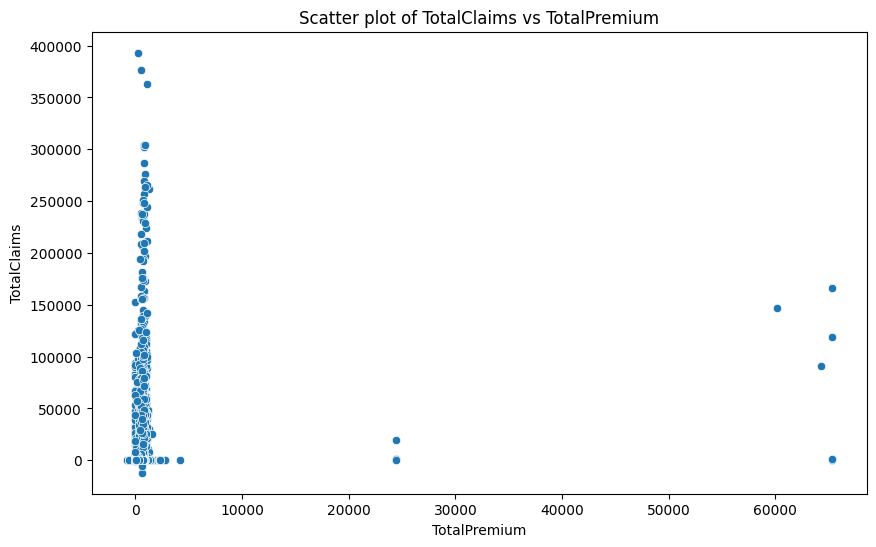

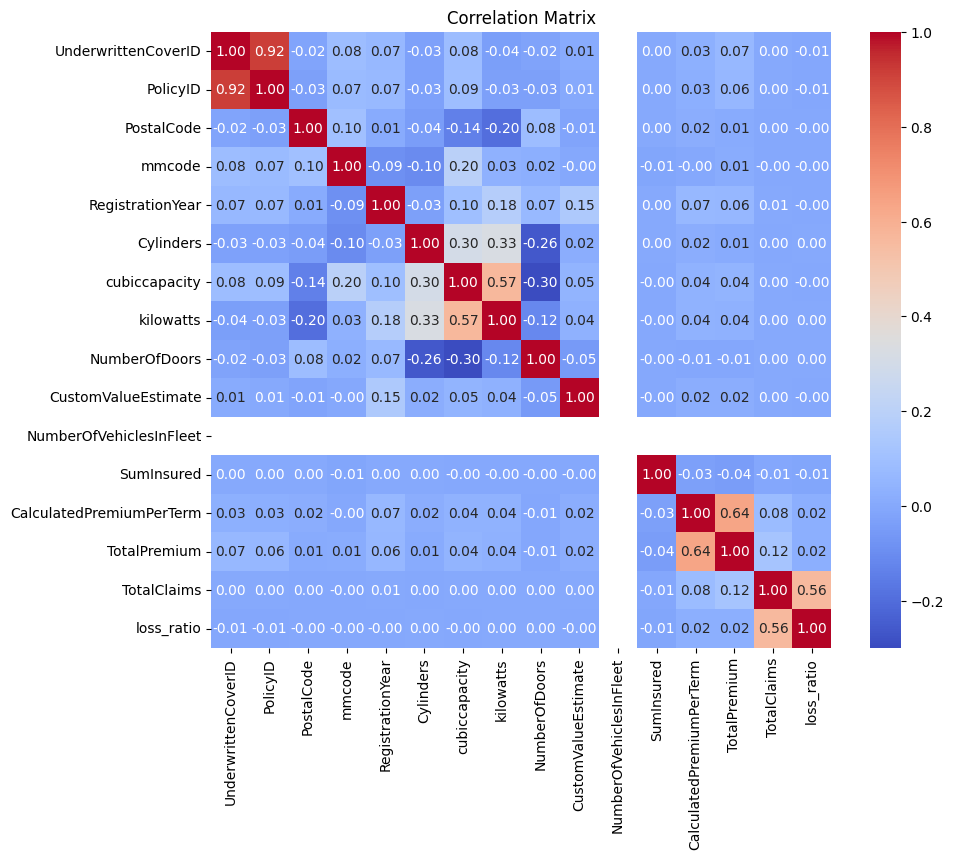

In [19]:
# Check if 'ZipCode' exists in the DataFrame before using it as hue
if 'ZipCode' in data.columns:
    eda.plot_scatter(data, 'TotalPremium', 'TotalClaims', hue='ZipCode')
else:
    eda.plot_scatter(data, 'TotalPremium', 'TotalClaims')

eda.plot_correlation_matrix(data)

## Outlier Detection

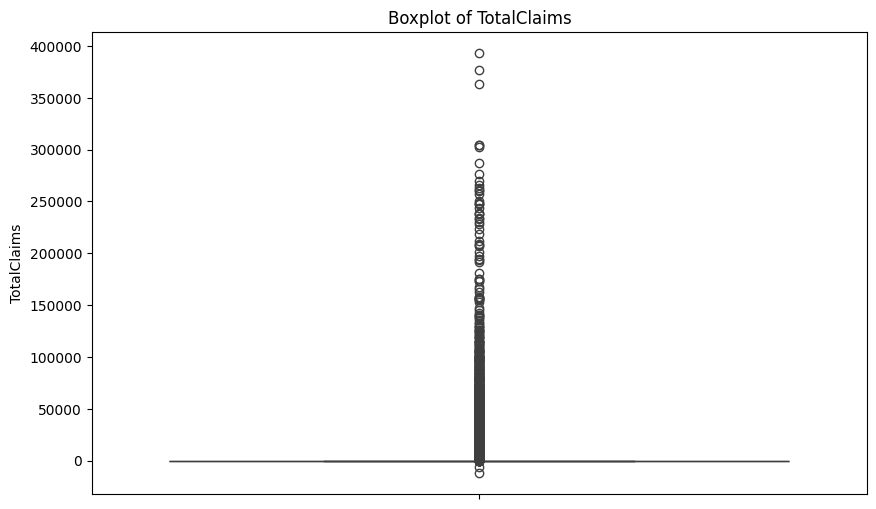

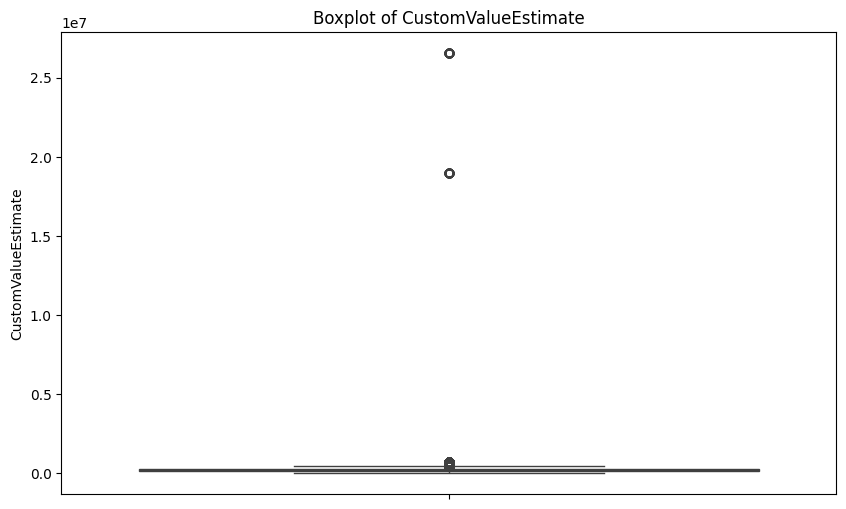

In [20]:
eda.plot_boxplot(data, 'TotalClaims')
eda.plot_boxplot(data, 'CustomValueEstimate')

## Creative Plots: Key Insights

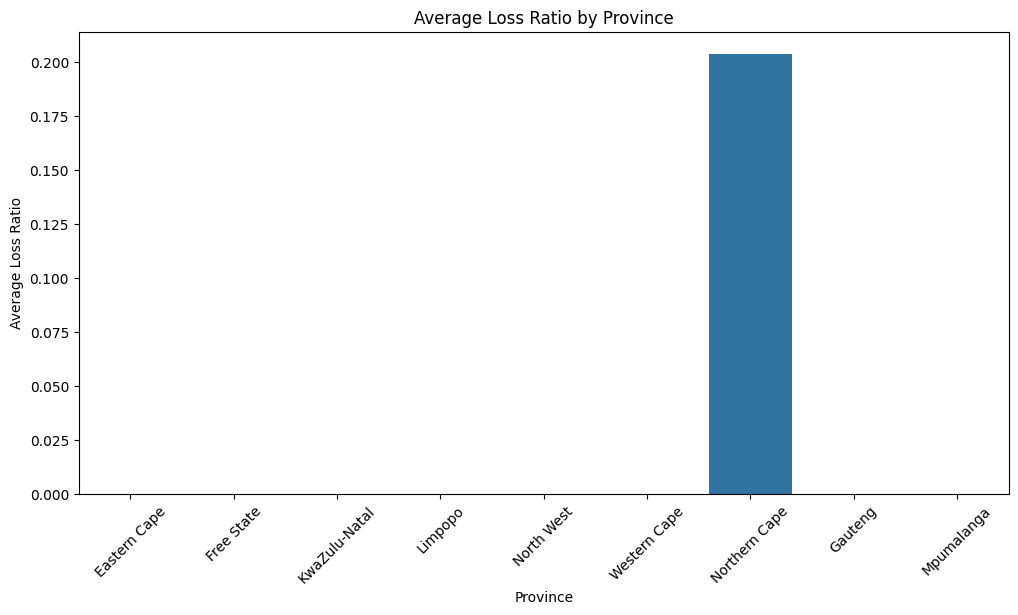

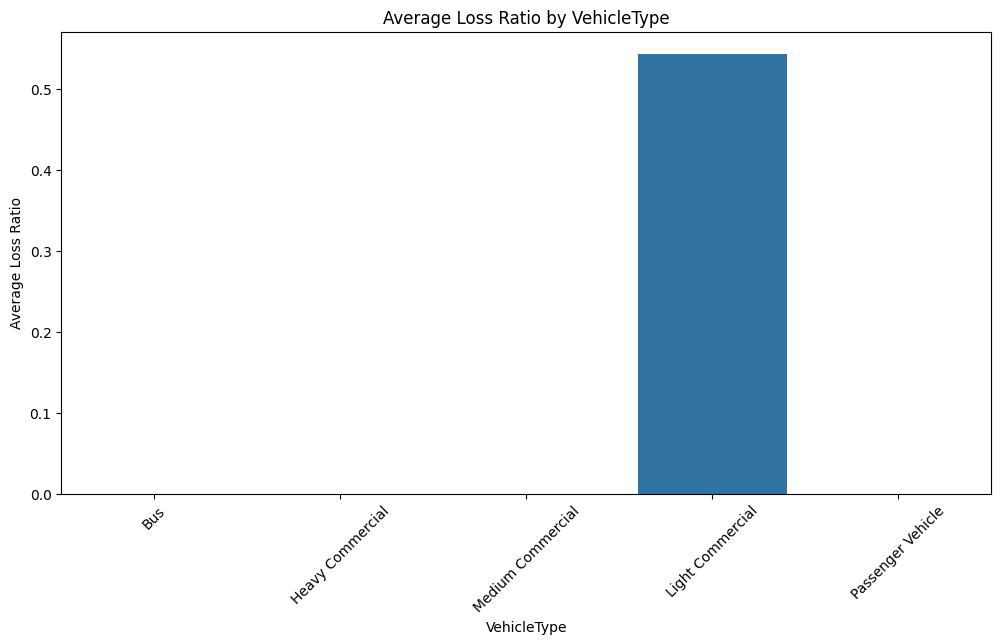

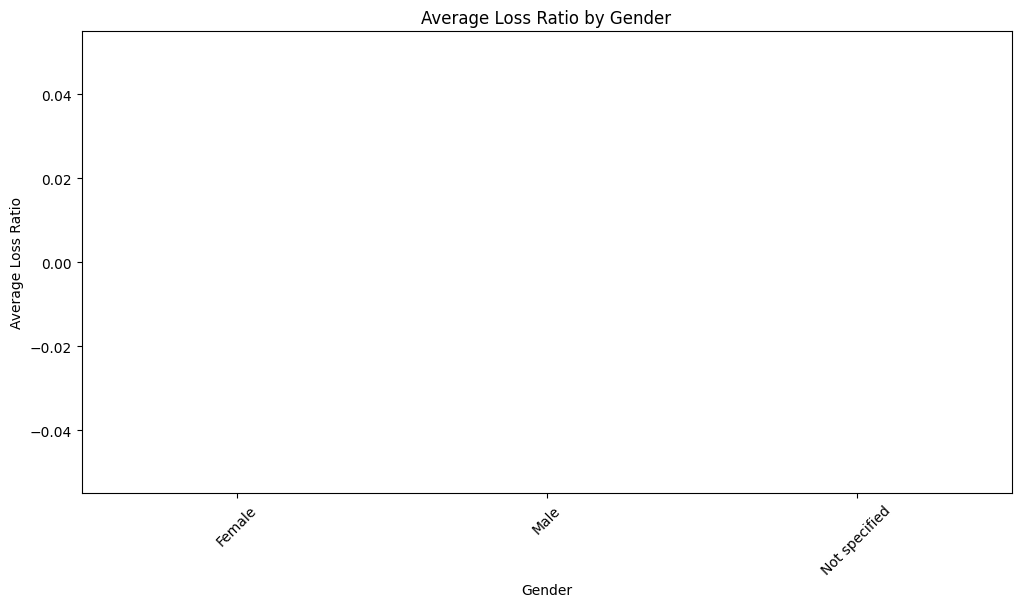

In [21]:
eda.plot_loss_ratio_by_group(data, 'Province')
eda.plot_loss_ratio_by_group(data, 'VehicleType')
eda.plot_loss_ratio_by_group(data, 'Gender')

# Task 3: Hypothesis Testing on Risk Drivers
This section statistically validates or rejects key hypotheses about risk drivers using claim frequency, claim severity, and margin.

## Metrics Calculation
We define:
- **Claim Frequency**: Proportion of policies with at least one claim.
- **Claim Severity**: Average claim amount, given a claim occurred.
- **Margin**: TotalPremium - TotalClaims.

## Hypothesis 1: No risk differences across provinces
H₀: There are no risk differences across provinces.

In [22]:
# Choose two provinces for A/B test (e.g., the two largest by count)
province_counts = data['Province'].value_counts()
province_a, province_b = province_counts.index[:2]

# Claim Frequency (Chi-squared test)
chi2, p_freq = eda.chi2_test_groups(data, 'Province', 'TotalClaims', province_a, province_b)
print(f"Chi-squared test for claim frequency between {province_a} and {province_b}: p-value = {p_freq:.4f}")

# Claim Severity (t-test)
t_stat, p_sev = eda.t_test_groups(data[data['TotalClaims'] > 0], 'Province', 'TotalClaims', province_a, province_b)
print(f"T-test for claim severity between {province_a} and {province_b}: p-value = {p_sev:.4f}")

Chi-squared test for claim frequency between Gauteng and Western Cape: p-value = 0.0000
T-test for claim severity between Gauteng and Western Cape: p-value = 0.0109


## Hypothesis 2: No risk differences between postal codes
H₀: There are no risk differences between postal codes.

# Choose two postal codes for A/B test (e.g., the two largest by count)
postal_counts = data['PostalCode'].value_counts()
postal_a, postal_b = postal_counts.index[:2]

# Claim Frequency (Chi-squared test)
chi2, p_freq_postal = eda.chi2_test_groups(data, 'PostalCode', 'TotalClaims', postal_a, postal_b)
print(f"Chi-squared test for claim frequency between {postal_a} and {postal_b}: p-value = {p_freq_postal:.4f}")

# Claim Severity (t-test)
t_stat, p_sev_postal = eda.t_test_groups(data[data['TotalClaims'] > 0], 'PostalCode', 'TotalClaims', postal_a, postal_b)
print(f"T-test for claim severity between {postal_a} and {postal_b}: p-value = {p_sev_postal:.4f}")

In [24]:
# Choose two zip codes for A/B test (e.g., the two largest by count)
from scipy import stats


zip_counts = data['PostalCode'].value_counts()
zip_a, zip_b = zip_counts.index[:2]

# Claim Frequency (Chi-squared test)
chi2, p_freq_zip = eda.chi2_test_groups(data, 'PostalCode', 'TotalClaims', zip_a, zip_b)
print(f"Chi-squared test for claim frequency between {zip_a} and {zip_b}: p-value = {p_freq_zip:.4f}")

# Claim Severity (t-test)
t_stat, p_sev_zip = eda.t_test_groups(data[data['TotalClaims'] > 0], 'PostalCode', 'TotalClaims', zip_a, zip_b)
print(f"T-test for claim severity between {zip_a} and {zip_b}: p-value = {p_sev_zip:.4f}")

# Margin (t-test)
margin_a = data[data['PostalCode'] == zip_a]
margin_b = data[data['PostalCode'] == zip_b]
t_stat, p_margin = stats.ttest_ind(
    margin_a['TotalPremium'] - margin_a['TotalClaims'],
    margin_b['TotalPremium'] - margin_b['TotalClaims'],
    nan_policy='omit'
)
print(f"T-test for margin between {zip_a} and {zip_b}: p-value = {p_margin:.4f}")

Chi-squared test for claim frequency between 2000 and 122: p-value = 0.0579
T-test for claim severity between 2000 and 122: p-value = 0.6736
T-test for margin between 2000 and 122: p-value = 0.1959


## Hypothesis 3: No significant margin (profit) difference between zip codes
H₀: There are no significant margin (profit) differences between zip codes.

## Hypothesis 4: No significant risk difference between Women and Men
H₀: There are not significant risk differences between Women and Men.

In [25]:
# Claim Frequency (Chi-squared test)
chi2, p_freq_gender = eda.chi2_test_groups(data, 'Gender', 'TotalClaims', 'Female', 'Male')
print(f"Chi-squared test for claim frequency between Female and Male: p-value = {p_freq_gender:.4f}")

# Claim Severity (t-test)
t_stat, p_sev_gender = eda.t_test_groups(data[data['TotalClaims'] > 0], 'Gender', 'TotalClaims', 'Female', 'Male')
print(f"T-test for claim severity between Female and Male: p-value = {p_sev_gender:.4f}")

Chi-squared test for claim frequency between Female and Male: p-value = 0.9515
T-test for claim severity between Female and Male: p-value = 0.6760


## Interpretation & Business Recommendation
For each hypothesis, if p-value < 0.05, reject the null hypothesis and provide a business interpretation.

Example: "We reject the null hypothesis for provinces (p < 0.01). Specifically, Province A exhibits a higher loss ratio than Province B, suggesting a regional risk adjustment to our premiums may be warranted."